In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 14})

/var/folders/bt/nlh_3ptx6znf2gx6qszlwdxm0000gn/T/ipykernel_1406/3763066874.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("RawTrafficData.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [3]:
df.head()

,value
2023-09-01 00:00:00,1.825067
2023-09-01 01:00:00,2.121939
2023-09-01 02:00:00,2.357743
2023-09-01 03:00:00,2.932698
2023-09-01 04:00:00,2.886991


In [4]:
df.describe()

,value
count,2160.000000
mean,2.492272
std,1.012229
min,0.490818
25%,1.617076
50%,2.560364
75%,3.042008
max,4.843150


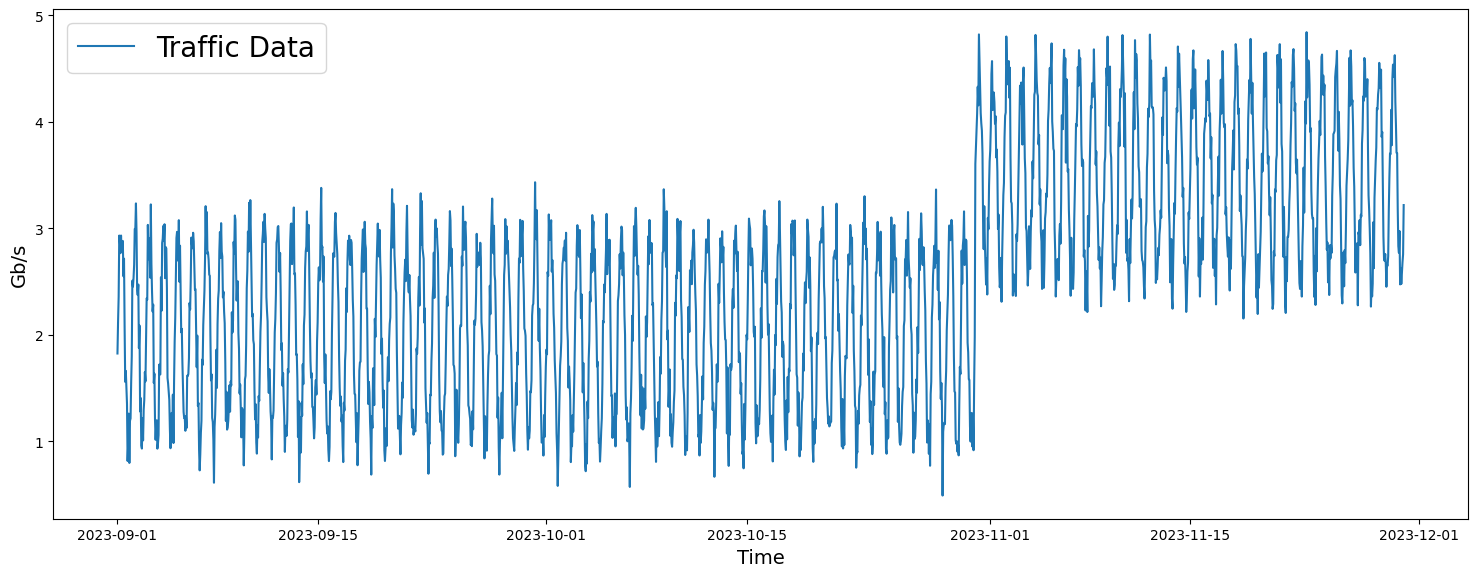

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(15, 6))
axs.plot(df.index, df.value, label = "Traffic Data")
axs.legend(fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Gb/s')
plt.xlabel('Time')
plt.tight_layout()
plt.savefig('./GeneratedPlots/RealTrafficData.png') 
plt.show()

# Detecting Drift using ADWIN

Change detected at index 1471, input value: 4.276681702217838


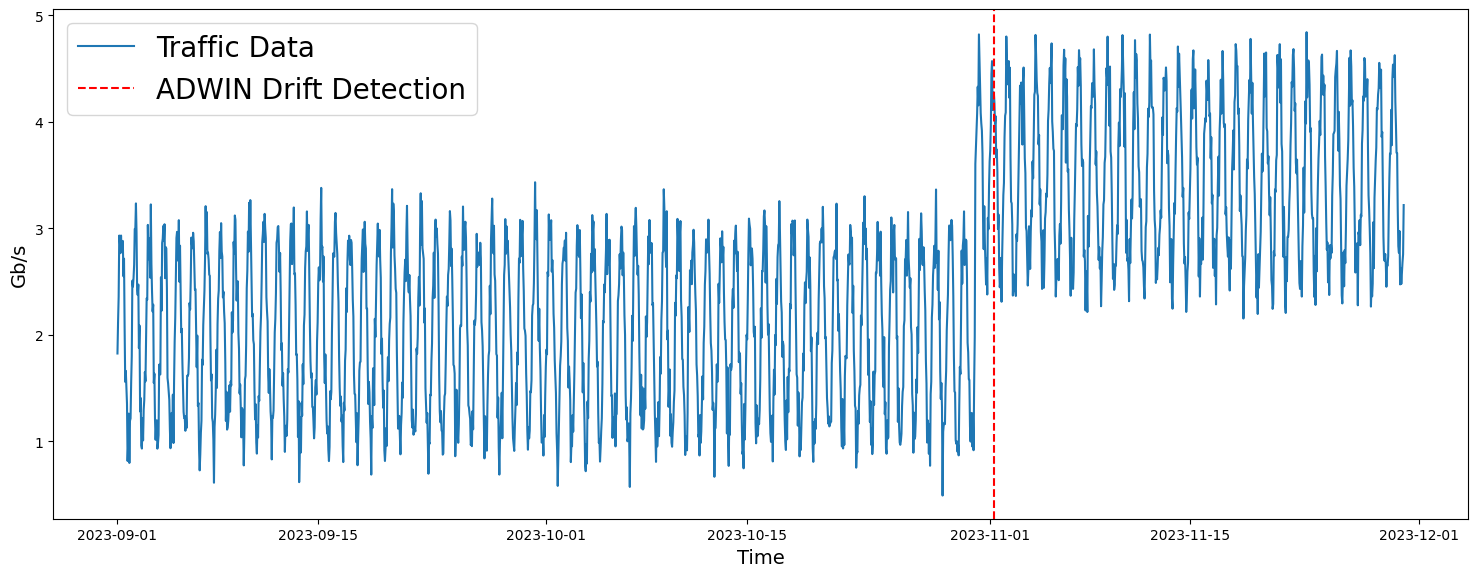

In [6]:
from river import drift
import numpy as np

drifts = []

adwin = drift.ADWIN(delta=0.1)

for i, val in enumerate(df.value):
    adwin.update(val)
    if adwin.drift_detected:
        print(f"Change detected at index {i}, input value: {val}")
        drifts.append(i)

fig, axs = plt.subplots(1, 1, figsize=(15, 6))
axs.plot(df.index, df.value, label = "Traffic Data")
for index in drifts:
    datetime_index_at_i = df.index[index]
    plt.axvline(x=datetime_index_at_i, color='red', linestyle='--', label='ADWIN Drift Detection')
axs.legend(fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Gb/s')
plt.xlabel('Time')
plt.tight_layout()
plt.savefig('./GeneratedPlots/DriftDetecion.png')
plt.show()


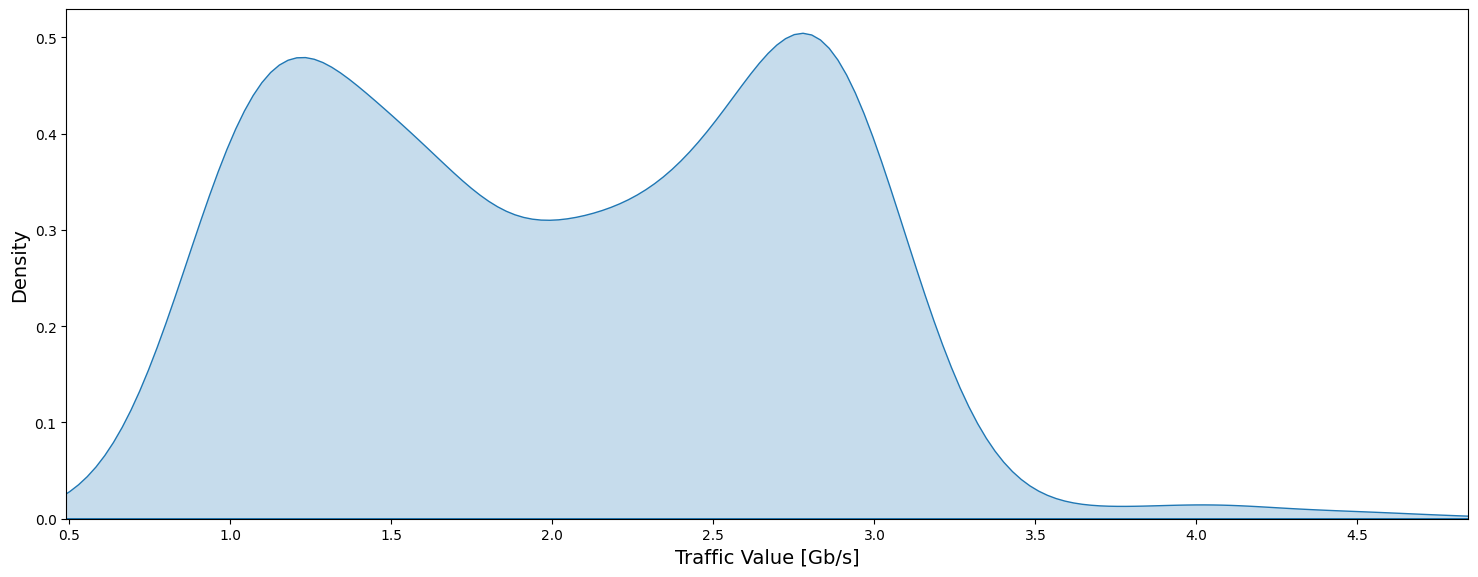

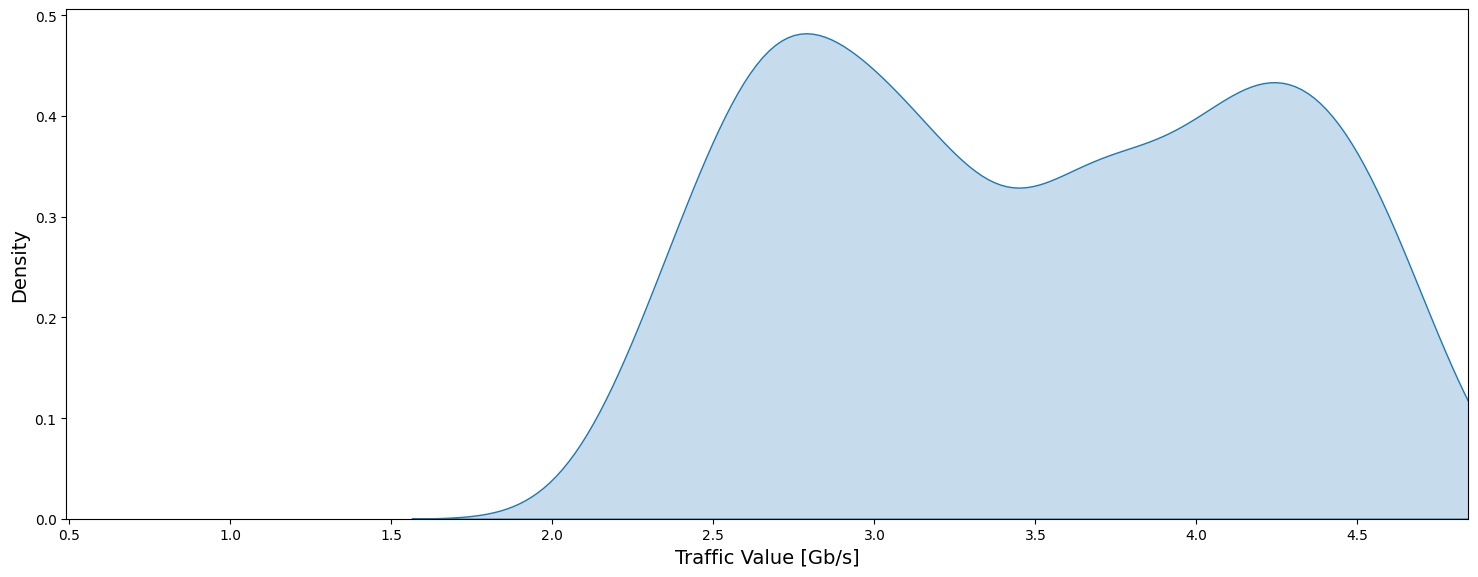

<Figure size 640x480 with 0 Axes>

In [9]:
extended_indices = [0] + drifts + [len(df)]
global_min = df['value'].min()
global_max = df['value'].max()

for i in range(len(extended_indices) - 1):    
    segment = df.iloc[extended_indices[i]:extended_indices[i+1]]

    fig, axs = plt.subplots(1, 1, figsize=(15, 6))
    sns.kdeplot(segment['value'], ax=axs, fill=True)

    axs.set_xlim(global_min, global_max)
    #axs.set_title(f'KDE from Index {extended_indices[i]} to {extended_indices[i+1]}')
    axs.set_xlabel('Traffic Value [Gb/s]')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(f'./GeneratedPlots/DataDistribution{i}.png')  # Saves as PNG file
    plt.show()   

plt.tight_layout()
plt.show()


# Exploring the Data for Time-Series Forecasting 
- What is its period/frequency?
- The data is captured hourly, probably daily pattern in the traffic

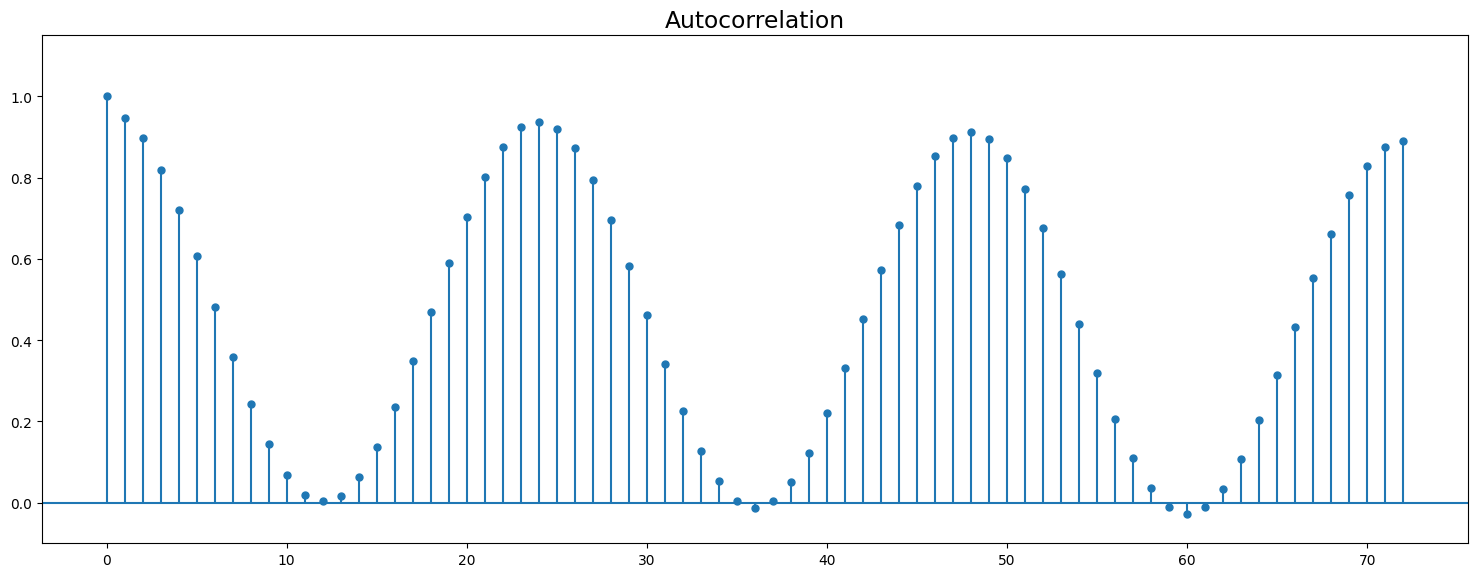

In [13]:

from statsmodels.graphics.tsaplots import plot_acf

fig, axs = plt.subplots(1, 1, figsize=(15, 6))
plot_acf(df.value, lags=24*3, ax=axs,alpha=None)  
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
axs.set_ylim(-0.1, 1.15) 
plt.tight_layout()
plt.savefig('./GeneratedPlots/RealDataACF.png')
plt.show()

- ACF repeating in intervals of 24 -> daily seasonality